In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

In [2]:
leads_data = pd.read_csv("Leads.csv")

In [3]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspecting the data

In [4]:
leads_data.shape

(9240, 37)

In [5]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
leads_data.isnull().sum() * 100/len(leads_data)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# Data cleaning

In [9]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Prospect ID and Lead Number

In [10]:
#Checking for duplicates in Prospect ID
leads_data.duplicated(subset=["Prospect ID"]).any()

False

In [11]:
#Checking for duplicates in Lead Number
leads_data.duplicated(subset=["Lead Number"]).any()

False

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the contacted people & can be dropped.

In [12]:
leads_data.drop(["Prospect ID", "Lead Number"], axis=1,inplace=True)

In [13]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


We see some columns having values "Select". Since we know the data was collected through a form, these values are actually null values. Let's convert it to null for all columns having "Select" values

In [14]:
len(leads_data) - leads_data[leads_data == "Select"].isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
leads_data = leads_data.replace("Select",np.nan)

In [16]:
cols_having_select = list(leads_data.columns[leads_data.isin(['Select']).any()])
cols_having_select

[]

In [17]:
#leads_data[cols_having_select] = leads_data[cols_having_select].apply(lambda x: x.replace("Select",np.NaN))
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [18]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [19]:
leads_data.isnull().sum() * 100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

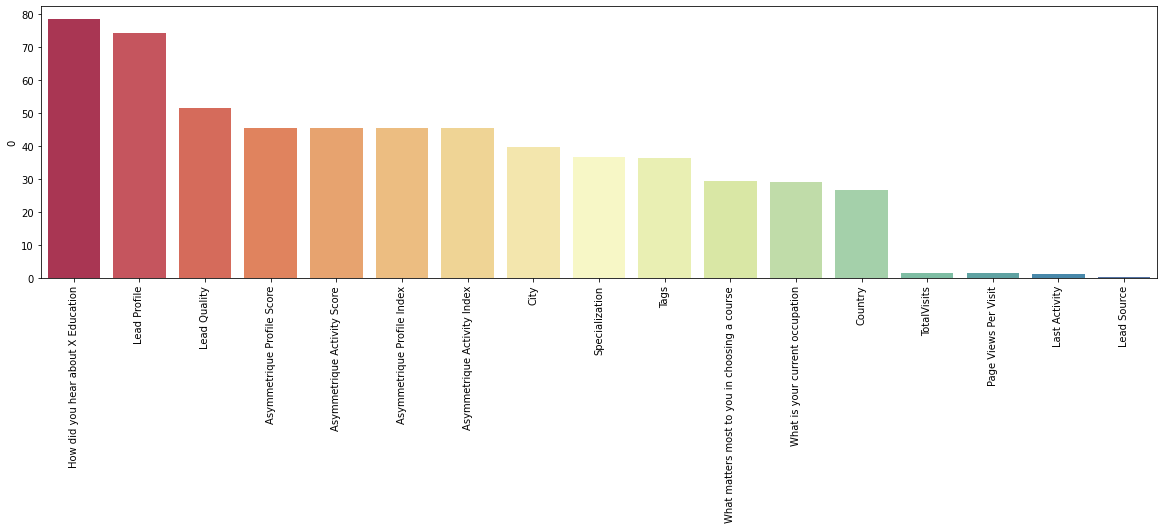

In [20]:
#Plotting columns with percentage of null values
nulls = (leads_data.isnull().sum()* 100/len(leads_data)).to_frame()
nulls = nulls[nulls[0]>0]
nulls.sort_values(by=0,ascending=False,inplace=True)
plt.figure(figsize=[20,5])
barp = sns.barplot(data=nulls,x=nulls.index,y=nulls[0],palette="Spectral")
for item in barp.get_xticklabels():
    item.set_rotation(90)

- For variables "How did you hear about X education" and "Lead Profile", they might have been important factors in deciding the target variable but ~75% data missing is lot and hence these columns should be dropped
- If we look at Lead Quality, partly the score is based on intuition of the employee. And since it has ~51% data missing, it makes all the more sense to drop this column too.
- Also for "Assymetrique ...." columns, the percentage of missing values are more than 45% and we don't know much about these indexes and scores as to how they are determined. It's safe to drop these columns.

In [21]:
# Dropping columns which have null values more than 45%
leads_data.drop(nulls[nulls[0]>45].index,axis=1,inplace=True)

In [22]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

## Treating missing values one by one

In [23]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

### Treating missing values of categorical variables

In [24]:
# Lead Source
# Since the missing values are very less compared to the actual data(~0.4%) we can drop these records
leads_data.dropna(subset=["Lead Source"],axis=0,inplace=True)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9204 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9204 non-null   object 
 3   Do Not Call                                    9204 non-null   object 
 4   Converted                                      9204 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9204 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        6778 

In [25]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.412429
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.412429
Last Activity                                     1.097349
Country                                          26.358105
Specialization                                   36.418948
What is your current occupation                  29.226423
What matters most to you in choosing a course    29.432855
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [26]:
#Last Activity
# Since the missing values are very less compared to the actual data(~1%) we can drop these records
leads_data.dropna(subset=["Last Activity"],axis=0,inplace=True)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        6778 

In [27]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.318576
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.318576
Last Activity                                     0.000000
Country                                          25.541030
Specialization                                   36.251785
What is your current occupation                  29.550698
What matters most to you in choosing a course    29.759420
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [28]:
#Country
leads_data.Country.value_counts()*100/len(leads_data)

# The data is very skewed as it has a lot of values "India"
# Since this is a categorical variable, we can impute it with the mode of data. But this will skew the data more than it already is.
# Even if we decide to create another category "Not Specified", it will not be adding any information as the data will still be skewed in favor of India.
# For now imputing the missing values with mode(India), but later this column will be dropped.
leads_data['Country'].fillna(leads_data['Country'].mode()[0], inplace=True)
leads_data.Country.value_counts(normalize=True)*100

India                   96.847193
United States            0.757992
United Arab Emirates     0.582226
Singapore                0.263649
Saudi Arabia             0.230693
United Kingdom           0.164781
Australia                0.142810
Qatar                    0.109854
Bahrain                  0.076898
Hong Kong                0.076898
France                   0.065912
Oman                     0.065912
unknown                  0.054927
Canada                   0.043942
Germany                  0.043942
South Africa             0.043942
Nigeria                  0.043942
Kuwait                   0.043942
Sweden                   0.032956
Bangladesh               0.021971
Philippines              0.021971
Belgium                  0.021971
Uganda                   0.021971
Asia/Pacific Region      0.021971
Netherlands              0.021971
Italy                    0.021971
China                    0.021971
Ghana                    0.021971
Malaysia                 0.010985
Sri Lanka     

In [29]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.318576
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.318576
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                   36.251785
What is your current occupation                  29.550698
What matters most to you in choosing a course    29.759420
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [30]:
#Specialization
leads_data.Specialization.value_counts()*100/len(leads_data)

# Since the percentage of missing values is very high, and the data is also well distributed amongst different specializations, it will not be wise to impute the missing values with the mode.
# Hence we will create a new category "Not Specified/Undecided". Also, it might be a case that the specialization is undecided now, hence this new category adds information to the dataset.
leads_data['Specialization'].fillna("Not Specified/Undecided", inplace=True)
leads_data.Specialization.value_counts(normalize=True)*100

Not Specified/Undecided              36.251785
Finance Management                   10.578930
Human Resource Management             9.205756
Marketing Management                  9.051961
Operations Management                 5.481709
Business Administration               4.416127
IT Projects Management                4.020653
Supply Chain Management               3.800945
Banking, Investment And Insurance     3.680105
Travel and Tourism                    2.219049
Media and Advertising                 2.219049
International Business                1.955399
Healthcare Management                 1.713721
Hospitality Management                1.219378
E-COMMERCE                            1.219378
Retail Management                     1.098539
Rural and Agribusiness                0.801933
E-Business                            0.626167
Services Excellence                   0.439416
Name: Specialization, dtype: float64

In [31]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.318576
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.318576
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                  29.550698
What matters most to you in choosing a course    29.759420
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [32]:
# What is your current occupation
# Let's rename the column to "Current Occupation"
leads_data.rename(columns={'What is your current occupation': 'Current Occupation'},inplace=True)

In [33]:
# Current Occupation
leads_data["Current Occupation"].value_counts(dropna=False)*100/len(leads_data)

# Since the data has high number of values "Unemployed", we can impute the missing value as "Unemployed". Creating a new category "Not provided" doesn't really add new information to the dataset. 
leads_data['Current Occupation'].fillna("Unemployed", inplace=True)
leads_data['Current Occupation'].value_counts(normalize=True)*100

Unemployed              89.882456
Working Professional     7.503021
Student                  2.262990
Other                    0.164781
Housewife                0.098869
Businessman              0.087883
Name: Current Occupation, dtype: float64

In [34]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.318576
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.318576
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
Current Occupation                                0.000000
What matters most to you in choosing a course    29.759420
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [35]:
# What matters most to you in choosing a course
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

# The data is very skewed as it has a lot of values "Better Career Prospects"
# For now imputing the missing values with mode(Better Career Prospects), but later this column will be dropped due to high skewness
leads_data['What matters most to you in choosing a course'].fillna("Better Career Prospects",inplace=True)
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100

Better Career Prospects      99.978029
Other                         0.010985
Flexibility & Convenience     0.010985
Name: What matters most to you in choosing a course, dtype: float64

In [36]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.318576
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.318576
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
Current Occupation                                0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [37]:
# Tags
leads_data.Tags.value_counts(dropna=False)

# The data is fairly distributed amongst different tags. Can't impute the missing value with mode. Creating a new category "Not Specified".
leads_data.Tags.fillna("Not Specified",inplace=True)
leads_data.Tags.value_counts(normalize=True)*100

Not Specified                                        36.625288
Will revert after reading the email                  22.256399
Ringing                                              13.061628
Interested in other courses                           5.591563
Already a student                                     5.108206
Closed by Horizzon                                    3.416456
switched off                                          2.636493
Busy                                                  2.032297
Lost to EINS                                          1.889487
Not doing further education                           1.592881
Interested  in full time MBA                          1.274305
Graduation in progress                                1.219378
invalid number                                        0.911787
Diploma holder (Not Eligible)                         0.692080
wrong number given                                    0.516313
opp hangup                                            0

In [38]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.318576
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.318576
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
Current Occupation                                0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [39]:
# City
leads_data.City.value_counts(normalize=True,dropna=False)

# Creating a new category will not necessarily add information. Also "Mumbai" covers 60% of data(excluding null values). We will impute the null values with "Mumbai".
leads_data.City.fillna("Mumbai",inplace=True)
leads_data.City.value_counts(normalize=True)

Mumbai                         0.744040
Thane & Outskirts              0.082171
Other Cities                   0.074701
Other Cities of Maharashtra    0.049434
Other Metro Cities             0.041525
Tier II Cities                 0.008129
Name: City, dtype: float64

In [40]:
leads_data.isnull().sum()*100/len(leads_data)

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.318576
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.318576
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
Current Occupation                               0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

### Treating missing values of numeric variables

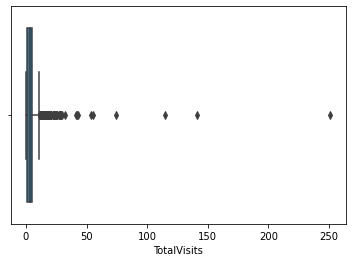

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
Current Occupation                               0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [41]:
# TotalVisits
sns.boxplot(x="TotalVisits",data=leads_data)
plt.show()

#Since the percentage of missing values is very low ~0.3%, we can drop these records
leads_data.dropna(subset=["TotalVisits"],axis=0,inplace=True)
leads_data.isnull().sum()*100/len(leads_data)

# Standardizing values and Checking imbalanced columns

We will also check which columns can be dropped due to the imbalanced nature of the columns

In [42]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

#### Lead Origin

In [43]:
# Lead Origin
leads_data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

#### Lead Source

In [44]:
#Lead Source
leads_data['Lead Source'].value_counts()

# We see Google appearing 2 times. We can merge them into one.
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google','Google')
leads_data['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
blog                    1
testone                 1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

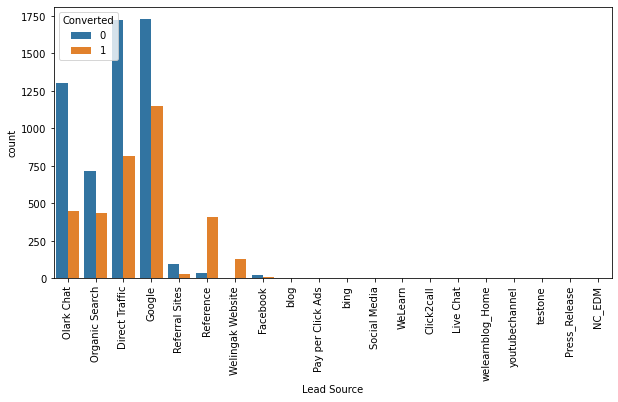

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

In [45]:
#Lead Source
plt.figure(figsize=[10,5])
sns.countplot(x='Lead Source',data=leads_data,hue='Converted')
plt.xticks(rotation=90)
plt.show()

# We can combine categories with very low values as 'Others'.
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['blog','bing','Click2call','Press_Release','Live Chat','Social Media','Pay per Click Ads','welearnblog_Home','WeLearn','testone','NC_EDM','youtubechannel'],'Others')
leads_data['Lead Source'].value_counts()

#### Do Not Email

In [46]:
leads_data['Do Not Email'].value_counts(normalize=True)*100

# Column is imbalanced. Though this feature might be very important but the resulting model will always favor the higher category. 
# Since we can't sample data again, and other techniques might be an overkill, we will drop this column
columns_to_be_dropped = ['Do Not Email']

#### Do Not Call

In [47]:
leads_data['Do Not Call'].value_counts(normalize=True)*100

# Column is imbalanced. Though this feature might be very important but the resulting model will always favor the higher category. 
# Since we can't sample data again, and other techniques might be an overkill, we will drop this column
columns_to_be_dropped.append('Do Not Call')

#### Last Activity

In [48]:
leads_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

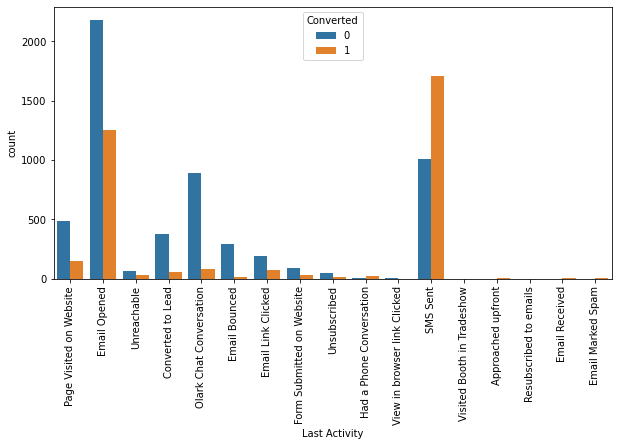

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Had a Phone Conversation       25
Other Activity                 17
Name: Last Activity, dtype: int64

In [49]:
plt.figure(figsize=[10,5])
sns.countplot(x='Last Activity',data=leads_data,hue='Converted')
plt.xticks(rotation=90)
plt.show()

#Let's combine some activities(with low values) to 'Other Activity'
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Other Activity')
leads_data['Last Activity'].value_counts()

#### Country

In [50]:
leads_data.Country.value_counts(normalize=True)*100

# Due to imbalanced data, we will drop this column
columns_to_be_dropped.append('Country')

#### Specialization

In [51]:
leads_data.Specialization.value_counts(normalize=True)*100

Not Specified/Undecided              36.169275
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
Hospitality Management                1.223275
E-COMMERCE                            1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

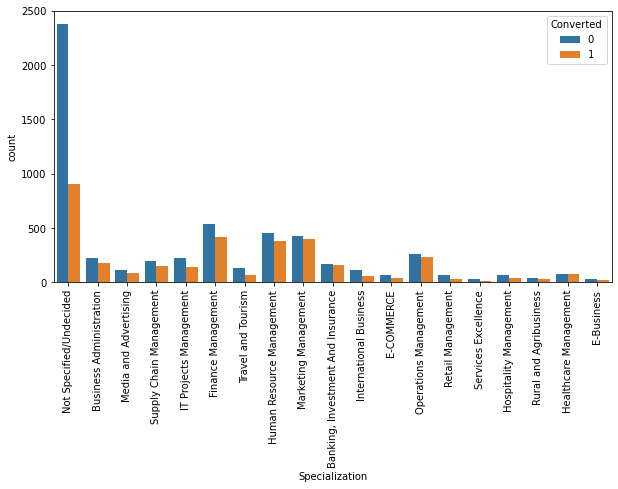

Not Specified/Undecided              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Other Specializations                 170
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Name: Specialization, dtype: int64

In [52]:
plt.figure(figsize=[10,5])
sns.countplot(x='Specialization',data=leads_data,hue='Converted')
plt.xticks(rotation=90)
plt.show()

# Combining specializations with less than 1% values into "Other Specializations"
leads_data['Specialization'] = leads_data['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'],'Other Specializations')
leads_data.Specialization.value_counts()

#### Current Occupation

In [53]:
leads_data['Current Occupation'].value_counts(normalize=True)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: Current Occupation, dtype: float64

#### What matters most to you in choosing a course

In [54]:
leads_data['What matters most to you in choosing a course'].value_counts()

# Due to imbalanced data, we will drop this column
columns_to_be_dropped.append('What matters most to you in choosing a course')

#### Search

In [55]:
leads_data.Search.value_counts(normalize=True)*100

# Due to imbalanced data, we will drop this column
columns_to_be_dropped.append('Search')

#### Magazine

In [56]:
leads_data.Magazine.value_counts(normalize=True)*100

# Feature is irrelevant in modelling as it is a constant. We will drop this column
columns_to_be_dropped.append('Magazine')

#### Newspaper Article

In [57]:
leads_data['Newspaper Article'].value_counts(normalize=True)*100

# Due to imbalanced data, we will drop this column
columns_to_be_dropped.append('Newspaper Article')

#### X Education Forums

In [58]:
leads_data['X Education Forums'].value_counts(normalize=True)*100

# Due to imbalanced data, we will drop this column
columns_to_be_dropped.append('X Education Forums')

#### Newspaper

In [59]:
leads_data['Newspaper'].value_counts(normalize=True)*100

# Due to imbalanced data, we will drop this column
columns_to_be_dropped.append('Newspaper')

#### Digital Advertisement

In [60]:
leads_data['Digital Advertisement'].value_counts(normalize=True)*100

# Due to imbalanced data, we will drop this column
columns_to_be_dropped.append('Digital Advertisement')

#### Through Recommendations

In [61]:
leads_data['Through Recommendations'].value_counts(normalize=True)*100

# Due to imbalanced data, we will drop this column
columns_to_be_dropped.append('Through Recommendations')

#### Receive More Updates About Our Courses

In [62]:
leads_data['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

# Feature is irrelevant in modelling as it is a constant. We will drop this column
columns_to_be_dropped.append('Receive More Updates About Our Courses')

#### Tags

In [63]:
leads_data.Tags.value_counts(normalize=True)*100

Not Specified                                        36.665197
Will revert after reading the email                  22.217324
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0

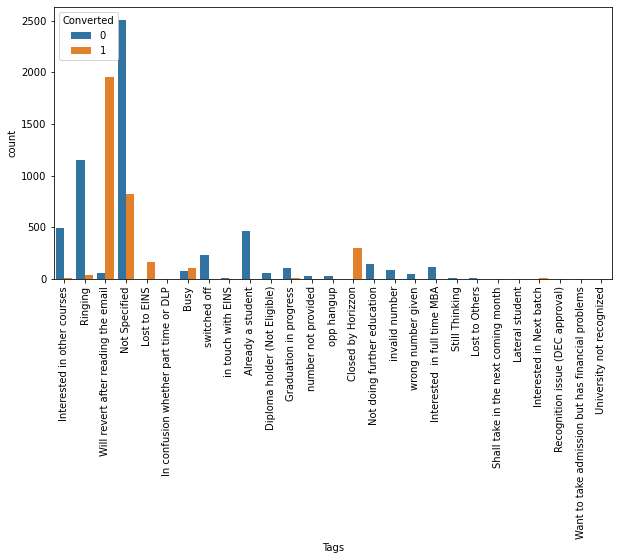

Not Specified                          3327
Will revert after reading the email    2016
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
Other Tags                              300
switched off                            240
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
Name: Tags, dtype: int64

In [64]:
plt.figure(figsize=[10,5])
sns.countplot(x='Tags',data=leads_data,hue='Converted')
plt.xticks(rotation=90)
plt.show()

# Combining tags with less than 1% values into "Other Tags"
leads_data['Tags'] = leads_data['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other Tags')
leads_data.Tags.value_counts()

#### Update me on Supply Chain Content

In [65]:
leads_data['Update me on Supply Chain Content'].value_counts(normalize=True)*100

# Feature is irrelevant in modelling as it is a constant. We will drop this column
columns_to_be_dropped.append('Update me on Supply Chain Content')

#### Get updates on DM Content

In [66]:
leads_data['Get updates on DM Content'].value_counts(normalize=True)*100

# Feature is irrelevant in modelling as it is a constant. We will drop this column
columns_to_be_dropped.append('Get updates on DM Content')

#### City

In [67]:
leads_data.City.value_counts(normalize=True)*100

# Nothing to do

Mumbai                         74.410403
Thane & Outskirts               8.210271
Other Cities                    7.493939
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: City, dtype: float64

#### I agree to pay the amount through cheque

In [68]:
leads_data['I agree to pay the amount through cheque'].value_counts(normalize=True)*100

# Feature is irrelevant in modelling as it is a constant. We will drop this column
columns_to_be_dropped.append('I agree to pay the amount through cheque')

#### A free copy of Mastering The Interview

In [69]:
leads_data['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

# Nothing to do

No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64

#### Last Notable Activity

In [70]:
leads_data['Last Notable Activity'].value_counts(normalize=True)*100

# Combining activities with less than 1% values into "Other Activity"
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Resubscribed to emails','Approached upfront','Form Submitted on Website','View in browser link Clicked','Email Received'],'Other Activity')
leads_data['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other Activity              158
Name: Last Notable Activity, dtype: int64

# Dropping columns which were identified earlier

In [71]:
columns_to_be_dropped

['Do Not Email',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [72]:
leads_data.drop(columns_to_be_dropped,axis=1,inplace=True)

In [73]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   Current Occupation                      9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  City                                    9074 non-null   obje

# Outlier Treatment

#### TotalVisits

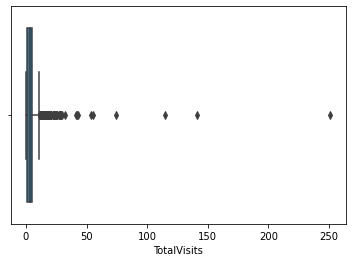

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2322,Landing Page Submission,Direct Traffic,0,141.0,755,6.71,Page Visited on Website,Human Resource Management,Unemployed,Not Specified,Mumbai,Yes,Page Visited on Website
5608,Landing Page Submission,Referral Sites,0,115.0,187,8.21,Page Visited on Website,Other Specializations,Unemployed,Not Specified,Mumbai,No,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,1,251.0,49,1.48,Page Visited on Website,Supply Chain Management,Unemployed,Interested in other courses,Mumbai,Yes,Page Visited on Website


In [74]:
sns.boxplot(leads_data.TotalVisits)
plt.show()
leads_data[leads_data.TotalVisits > 100]

In [75]:
# Having visits greater than 100 is a very extreme case and very rare. Since the values are too extreme and there are only 3 records, we can drop these records
leads_data = leads_data[~(leads_data.TotalVisits > 100)]

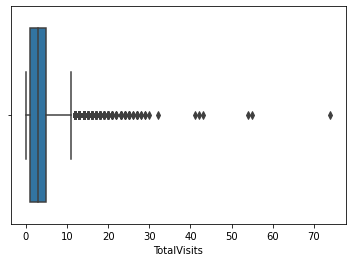

0.700     4.00
0.900     7.00
0.950    10.00
0.990    17.00
0.995    20.00
0.999    28.93
Name: TotalVisits, dtype: float64

In [76]:
sns.boxplot(leads_data.TotalVisits)
plt.show()

# There are still visible outliers. Let's check quantile values
leads_data.TotalVisits.quantile([0.7,0.9,0.95,0.99,0.995,0.999])

In [77]:
leads_data[leads_data.TotalVisits > 30]

# We can cap the values to 30
leads_data['TotalVisits'][leads_data.TotalVisits > 30] = 30

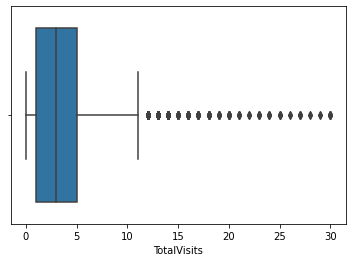

In [78]:
sns.boxplot(leads_data.TotalVisits)
plt.show()

#### Total Time Spent on Website

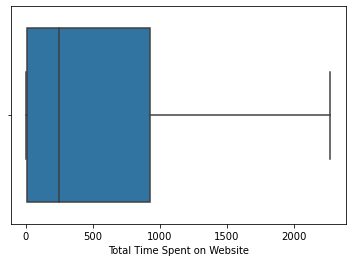

In [79]:
sns.boxplot(leads_data['Total Time Spent on Website'])
plt.show()

#### Page Views Per Visit

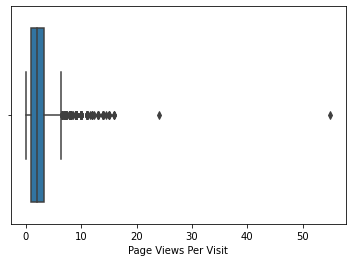

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,0,30.0,297,55.0,Page Visited on Website,IT Projects Management,Unemployed,Not Specified,Other Cities,Yes,Modified
6805,API,Organic Search,1,24.0,1527,24.0,Page Visited on Website,Not Specified/Undecided,Unemployed,Not Specified,Mumbai,No,Modified


In [80]:
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

leads_data[leads_data['Page Views Per Visit']>20]

In [81]:
# For these 2 records the total page views comes to be 
# 1. 30*55
# 2. 24*24
# These are a bit extreme. Since these are only 2 records, we can safely drop it

leads_data = leads_data[~(leads_data['Page Views Per Visit'] > 20)]

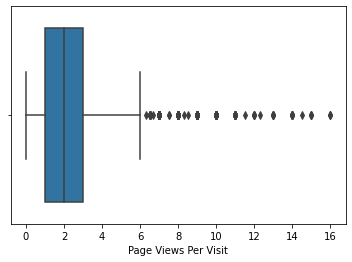

In [82]:
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

In [83]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9069 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9069 non-null   object 
 1   Lead Source                             9069 non-null   object 
 2   Converted                               9069 non-null   int64  
 3   TotalVisits                             9069 non-null   float64
 4   Total Time Spent on Website             9069 non-null   int64  
 5   Page Views Per Visit                    9069 non-null   float64
 6   Last Activity                           9069 non-null   object 
 7   Specialization                          9069 non-null   object 
 8   Current Occupation                      9069 non-null   object 
 9   Tags                                    9069 non-null   object 
 10  City                                    9069 non-null   obje

# EDA

## Checking Data Imbalance

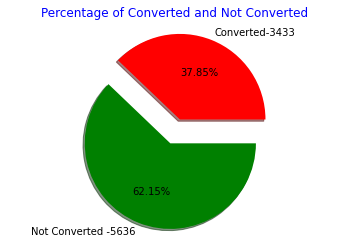

In [84]:
pie_labels=['Converted-'+str(leads_data['Converted'][leads_data.Converted==1].count()),'Not Converted -'+str(leads_data['Converted'][leads_data.Converted==0].count())]
pie_share=[leads_data['Converted'][leads_data.Converted==1].count()/leads_data['Converted'].count(),
           leads_data['Converted'][leads_data.Converted==0].count()/leads_data['Converted'].count()]
figureObject, axesObject = plt.subplots()
pie_colors=('red','green')
pie_explode=(.3,.0)
axesObject.pie(pie_share,labels=pie_labels,explode=pie_explode,autopct='%.2f%%',colors=pie_colors,startangle=0,shadow=True)
axesObject.axis('equal')
plt.title('Percentage of Converted and Not Converted',color='blue')
plt.show()

Data is not imbalanced

## Univariate Analysis

### Univariate Analysis of numeric variables

In [85]:
num_cols = list(leads_data.describe().columns)
num_cols.remove('Converted')
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

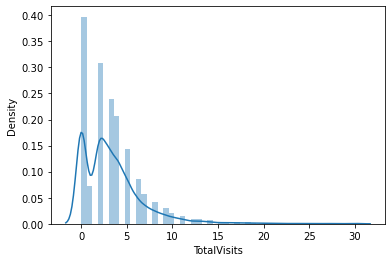

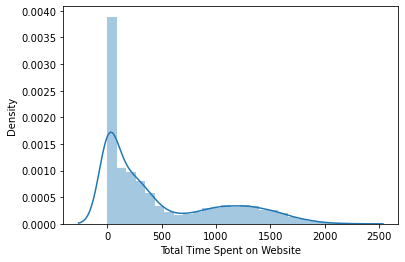

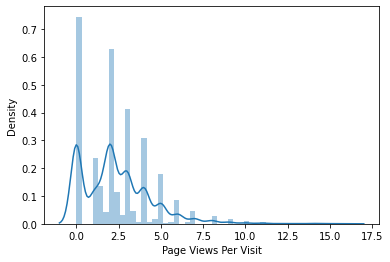

In [86]:
for i in num_cols:
    sns.distplot(leads_data[i])
    plt.show()

Multiple peaks are observed in all the numeric variables

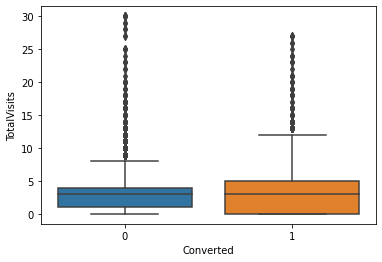

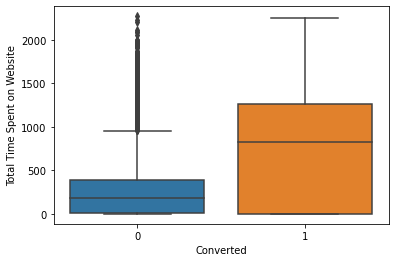

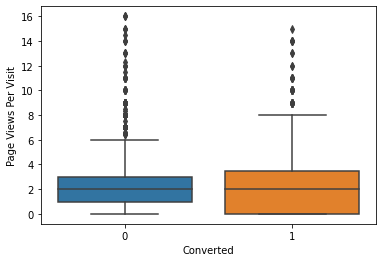

In [192]:
for i in num_cols:
    sns.boxplot(x="Converted",y=i,data=leads_data)
    plt.show()

- Total visits v/s Converted
    - Median is same. But higher IQR observed.
    - Not much effect on conversion rate
- Total time spent on website
    - Those who have spent more time on website have converted more.
- Page Views per Visit
    - Median is same. But higher IQR observed.
    - Not much effect on conversion rate

### Univariate Analysis of categorical variables

In [87]:
cat_cols = list(leads_data.select_dtypes(include='object').columns)
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Current Occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

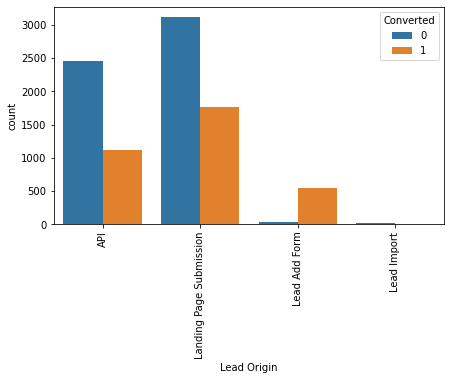

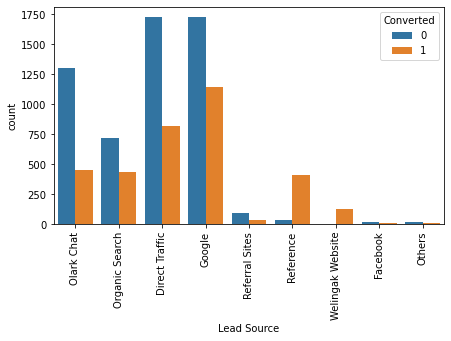

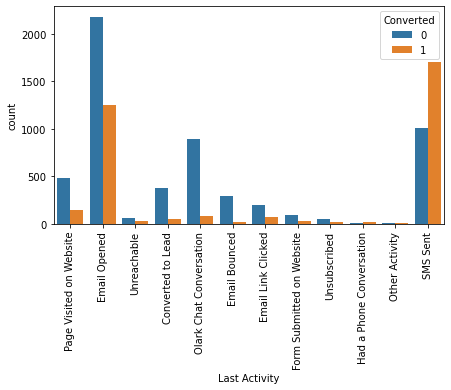

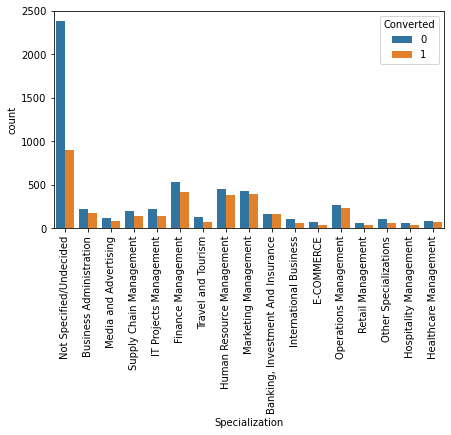

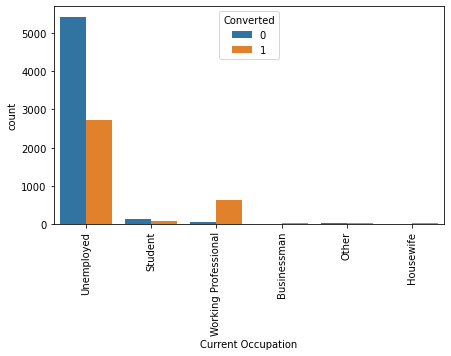

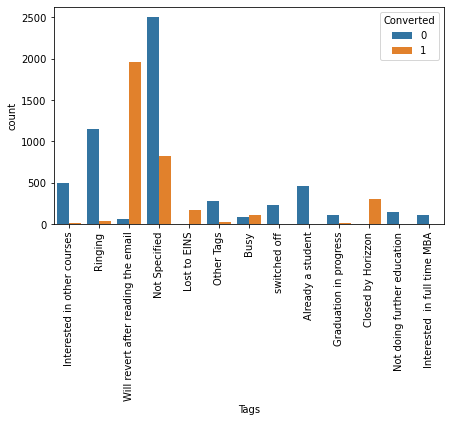

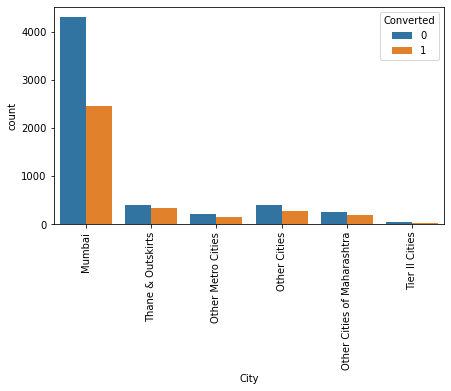

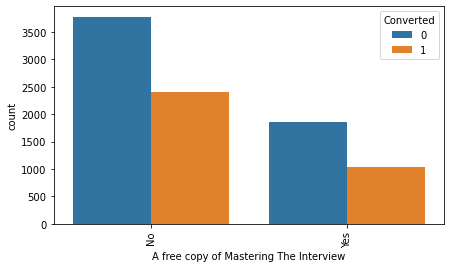

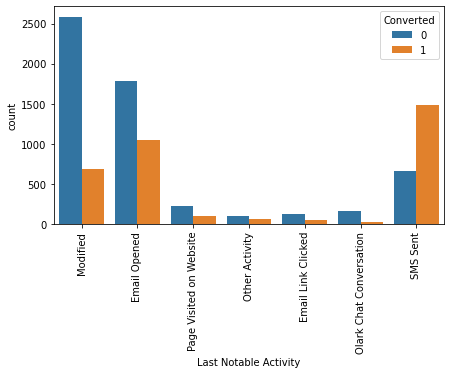

In [88]:
for i in cat_cols:
    plt.figure(figsize=[7,4])
    sns.countplot(x=i, hue='Converted',data=leads_data)
    plt.xticks(rotation=90)
    plt.show()

- Lead Add Form had a very high conversion rate
- People referred or on Welingak Website were likely to be converted more than any other source
- If an SMS was sent most recently, they were likely to be converted more than any other last activity
- Those opting for Management courses were likely to be converted
- Thane and Outskirts had a good conversion rate

## Bivariate Analysis

### Bivariate Analysis of numeric variables

In [90]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

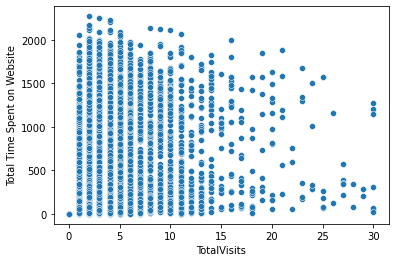

In [91]:
# TotalVisits v/s Total Time Spent on Website
sns.scatterplot(x='TotalVisits',y='Total Time Spent on Website',data=leads_data)
plt.show()

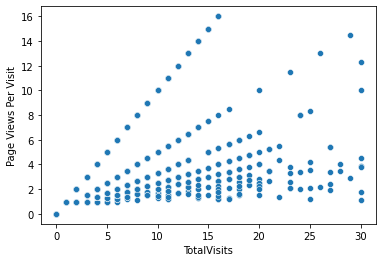

In [92]:
# TotalVisits v/s Page Views Per Visit
sns.scatterplot(x='TotalVisits',y='Page Views Per Visit',data=leads_data)
plt.show()

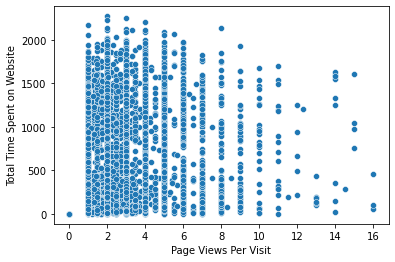

In [93]:
# Total Time Spent on Website v/s Page Views Per Visit
sns.scatterplot(x='Page Views Per Visit',y='Total Time Spent on Website',data=leads_data)
plt.show()

No definite pattern observed

### Bivariate Analysis of categorical columns

In [94]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Current Occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

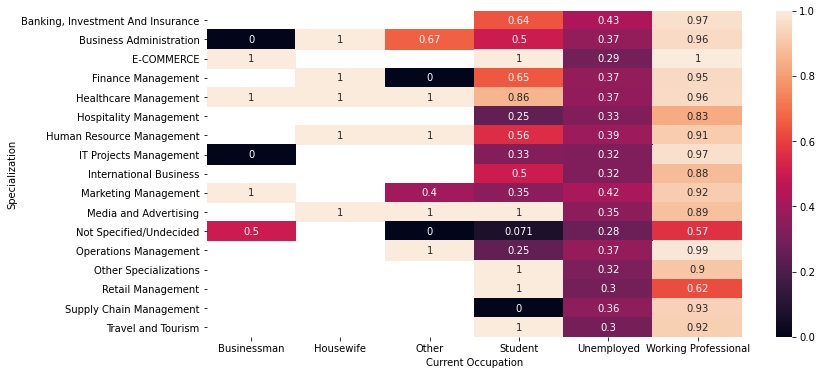

In [95]:
# Specialization v/s Current Occupation
plt.figure(figsize=[12,6])
spec_occu = pd.pivot_table(data=leads_data,values="Converted",index="Specialization", columns="Current Occupation")
sns.heatmap(spec_occu, annot=True)
plt.show()

- Working Professionals had higher conversion rate in all Specializations
- Unemployed has very less conversion rate for all Specializations

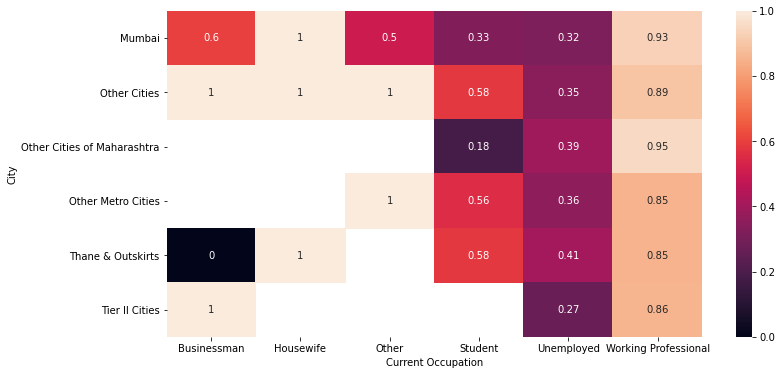

In [96]:
# Current Occupation v/s City
plt.figure(figsize=[12,6])
occu_city = pd.pivot_table(data=leads_data,values="Converted",index="City",columns="Current Occupation")
sns.heatmap(occu_city,annot=True)
plt.show()

- Working Professionals had higher conversion rate in all Cities
- Unemployed has very less conversion rate for all Cities

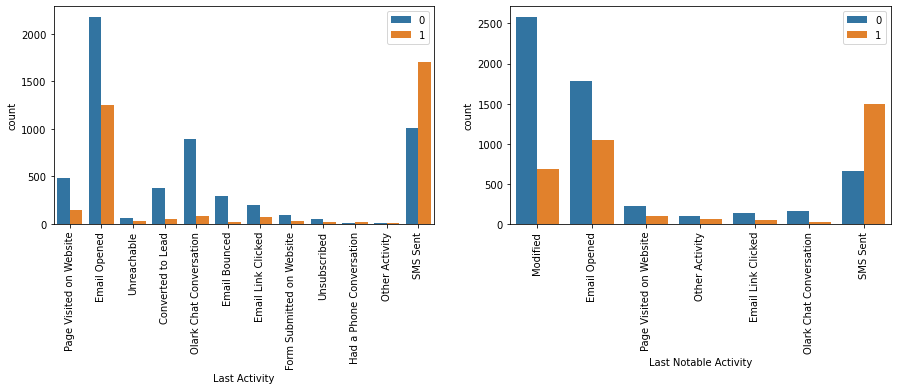

In [97]:
plt.figure(figsize=(15,4)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=leads_data,x='Last Activity',hue='Converted')
plt.title('')
plt.legend(loc='upper right')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = sns.countplot(data=leads_data,x='Last Notable Activity',hue='Converted')
plt.title('')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

We have somewhat similar categories in these 2 features and represent almost the same thing. We can drop one of them

In [98]:
leads_data.drop("Last Notable Activity",axis=1,inplace=True)

In [99]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9069 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9069 non-null   object 
 1   Lead Source                             9069 non-null   object 
 2   Converted                               9069 non-null   int64  
 3   TotalVisits                             9069 non-null   float64
 4   Total Time Spent on Website             9069 non-null   int64  
 5   Page Views Per Visit                    9069 non-null   float64
 6   Last Activity                           9069 non-null   object 
 7   Specialization                          9069 non-null   object 
 8   Current Occupation                      9069 non-null   object 
 9   Tags                                    9069 non-null   object 
 10  City                                    9069 non-null   obje

## Correlations

In [100]:
cor = leads_data.drop("Converted",axis=1).corr()
cor

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.309246,0.671313
Total Time Spent on Website,0.309246,1.000000,0.330349
Page Views Per Visit,0.671313,0.330349,1.000000


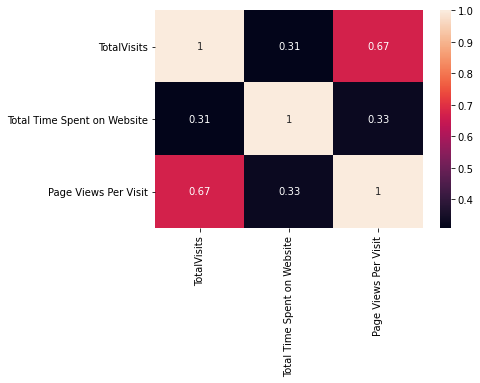

In [101]:
sns.heatmap(cor,annot=True)
plt.show()

Not so high correlation between numeric variables

# Data Preparation for Model

## Converting some binary variables (Yes/No) to 1/0

In [102]:
# A free copy of Mastering The Interview
leads_data['A free copy of Mastering The Interview'].value_counts()
leads_data['A free copy of Mastering The Interview'] = leads_data['A free copy of Mastering The Interview'].map({"Yes":1,"No":0})
leads_data['A free copy of Mastering The Interview'].value_counts()

0    6184
1    2885
Name: A free copy of Mastering The Interview, dtype: int64

## Creating Dummy variables

In [103]:
cat_cols = list(leads_data.select_dtypes(include='object').columns)
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Current Occupation',
 'Tags',
 'City']

In [104]:
leads_categorical = leads_data[cat_cols]
leads_categorical.head()

,Lead Origin,Lead Source,Last Activity,Specialization,Current Occupation,Tags,City
0,API,Olark Chat,Page Visited on Website,Not Specified/Undecided,Unemployed,Interested in other courses,Mumbai
1,API,Organic Search,Email Opened,Not Specified/Undecided,Unemployed,Ringing,Mumbai
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,Converted to Lead,Not Specified/Undecided,Unemployed,Will revert after reading the email,Mumbai


In [105]:
leads_dummy = pd.get_dummies(leads_categorical, drop_first=True)
leads_dummy.head(10)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
leads_data_final = pd.concat([leads_data, leads_dummy], axis=1)
leads_data_final.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Tags,...,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified/Undecided,Unemployed,Interested in other courses,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified/Undecided,Unemployed,Ringing,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,...,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified/Undecided,Unemployed,Will revert after reading the email,...,0,0,0,1,0,0,0,0,0,0


In [107]:
leads_data_final.drop(cat_cols,axis=1,inplace=True)

In [108]:
leads_data_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Train-Test split

In [109]:
X = leads_data_final.drop("Converted",axis=1)
y = leads_data_final.Converted

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [111]:
features_to_be_scaled = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = StandardScaler()
X_train[features_to_be_scaled] = scaler.fit_transform(X_train[features_to_be_scaled])
X_test[features_to_be_scaled] = scaler.transform(X_test[features_to_be_scaled])

In [112]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5171,0.449674,-0.804323,0.064282,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5165,-0.965282,-0.885117,-1.132747,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8333,-0.116308,-0.561940,0.303688,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1248,-0.399299,1.863726,-0.175124,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1429,-0.399299,1.479953,-0.175124,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7824,-0.682291,-0.543577,-0.653935,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9131,-0.399299,0.104613,-0.175124,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
725,-0.399299,1.333054,-0.175124,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
6573,0.166683,-0.225909,-0.175124,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6554,0.449674,1.064964,1.261311,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Model Building

In [114]:
# First Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1225.4
Date:                Mon, 15 Mar 2021   Deviance:                       2450.8
Time:                        23:24:59   Pearson chi2:                 7.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.1427      7.795     -0.660      0.509     -20.420      10.135
TotalVisits                                  0.2180      0.076      2.858      0.004       0.069       0.368
Total Time Spent on Website                  1.1672      0.065     18.010      0.000       1.040       1.294
Page Views Per Visit                        -0.1255      0.083     -1.504      0.133      -0.289       0.038
A free copy of Mastering The Interview      -0.3298      0.176     -1.871      0.061      -0.675       0.016
Lead Origin_Landing Page Submission         -0.8869      0.240     -3.695      0.000      -1.357      -0.416
Lead Origin_Lead Add Form                   -1.0541      2.183     -0.483      0.629      -5.332       3.224
Lead Origin_Lead Import                     23.8968   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                       -22.9332   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                           0.1977      0.186      1.066      0.287      -0.166       0.561
Lead Source_Olark Chat                       1.2976      0.245      5.301      0.000       0.818       1.777
Lead Source_Organic Search                   0.4066      0.211      1.927      0.054      -0.007       0.820
Lead Source_Others                           0.6571      1.027      0.640      0.522      -1.356       2.670
Lead Source_Reference                        1.9458      2.236      0.870      0.384      -2.436       6.328
Lead Source_Referral Sites                  -0.1057      0.599     -0.176      0.860      -1.279       1.068
Lead Source_Welingak Website                 6.5994      2.309      2.858      0.004       2.074      11.125
Last Activity_Email Bounced                 -0.0495      0.568     -0.087      0.931      -1.162       1.063
Last Activity_Email Link Clicked             0.5257      0.498      1.056      0.291      -0.450       1.501
Last Activity_Email Opened                   1.3041      0.374      3.491      0.000       0.572       2.036
Last Activity_Form Submitted on Website      0.3144      0.661      0.476      0.634      -0.981       1.609
Last Activity_Had a Phone Conversation       1.7209      1.564      1.101      0.271      -1.344       4.785
Last Activity_Olark Chat Conversation       -0.4835      0.430     -1.126      0.260      -1.325       0.358
Last Activity_Other Activity                 1.9456      1.475      1.319      0.187      -0.946       4.837
Last Activity_Page Visited on Website        0.1798      0.439      0.410      0.682      -0.681       1.040
Last Activity_SMS Sent                       3.0248      0.376      8.053      0.000       2.289       3.761
Last Activity_Unreachable      

## Feature Selection using RFE

In [115]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [116]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('A free copy of Mastering The Interview', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 36),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', False, 40),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Had a Phone Conversation', False, 9),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Other Activity', False, 4),
 ('Last Activity_Page Visited on W

In [118]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [119]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Inter

## Assessing the model with StatsModels

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1261.0
Date:                Mon, 15 Mar 2021   Deviance:                       2522.0
Time:                        23:25:03   Pearson chi2:                 6.97e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5948      0.265    -17.309      0.000      -5.115      -4.075
Total Time Spent on Website                  1.1567      0.062     18.523      0.000       1.034       1.279
Lead Origin_Landing Page Submission         -0.8332      0.136     -6.121      0.000      -1.100      -0.566
Lead Origin_Lead Add Form                    0.7484      0.478      1.565      0.118      -0.189       1.686
Lead Source_Olark Chat                       0.8898      0.165      5.387      0.000       0.566       1.214
Lead Source_Welingak Website                 4.4399      0.869      5.109      0.000       2.737       6.143
Last Activity_Email Opened                   1.2569      0.145      8.675      0.000       0.973       1.541
Last Activity_SMS Sent                       2.9370      0.153     19.218      0.000       2.637       3.236
Tags_Busy                                    2.8286      0.314      9.022      0.000       2.214       3.443
Tags_Closed by Horizzon                      8.5835      0.770     11.146      0.000       7.074      10.093
Tags_Interested in other courses            -0.6487      0.490     -1.325      0.185      -1.608       0.311
Tags_Lost to EINS                            7.6499      0.649     11.791      0.000       6.378       8.921
Tags_Not Specified                           1.9760      0.230      8.601      0.000       1.526       2.426
Tags_Ringing                                -0.9677      0.316     -3.065      0.002      -1.586      -0.349
Tags_Will revert after reading the email     7.0474      0.295     23.858      0.000       6.468       7.626
Tags_switched off                           -1.5689      0.658     -2.385      0.017      -2.858      -0.280
============================================================================================================
"""

p-value is high for "Tags_Interested in other courses"

In [121]:
# Removing feature with high p-value
col = col.drop("Tags_Interested in other courses")
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

Building model again

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1261.9
Date:                Mon, 15 Mar 2021   Deviance:                       2523.9
Time:                        23:25:03   Pearson chi2:                 7.01e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7623      0.243    -19.594      0.000      -5.239      -4.286
Total Time Spent on Website                  1.1548      0.062     18.531      0.000       1.033       1.277
Lead Origin_Landing Page Submission         -0.8183      0.136     -6.038      0.000      -1.084      -0.553
Lead Origin_Lead Add Form                    0.7610      0.479      1.590      0.112      -0.177       1.699
Lead Source_Olark Chat                       0.8964      0.165      5.433      0.000       0.573       1.220
Lead Source_Welingak Website                 4.4344      0.869      5.101      0.000       2.731       6.138
Last Activity_Email Opened                   1.2573      0.145      8.682      0.000       0.973       1.541
Last Activity_SMS Sent                       2.9418      0.153     19.255      0.000       2.642       3.241
Tags_Busy                                    2.9805      0.299      9.956      0.000       2.394       3.567
Tags_Closed by Horizzon                      8.7374      0.764     11.433      0.000       7.239      10.235
Tags_Lost to EINS                            7.8038      0.642     12.160      0.000       6.546       9.062
Tags_Not Specified                           2.1332      0.208     10.265      0.000       1.726       2.541
Tags_Ringing                                -0.8131      0.301     -2.704      0.007      -1.402      -0.224
Tags_Will revert after reading the email     7.2017      0.280     25.744      0.000       6.653       7.750
Tags_switched off                           -1.4128      0.650     -2.172      0.030      -2.687      -0.138
============================================================================================================
"""

p-value is high for "Lead Origin_Lead Add Form"

In [123]:
# Removing feature with high p-value
col = col.drop("Lead Origin_Lead Add Form")
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off'],
      dtype='object')

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Mon, 15 Mar 2021   Deviance:                       2526.6
Time:                        23:25:03   Pearson chi2:                 7.08e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7298      0.242    -19.541      0.000      -5.204      -4.255
Total Time Spent on Website                  1.1435      0.062     18.442      0.000       1.022       1.265
Lead Origin_Landing Page Submission         -0.8697      0.132     -6.605      0.000      -1.128      -0.612
Lead Source_Olark Chat                       0.8490      0.162      5.240      0.000       0.531       1.166
Lead Source_Welingak Website                 5.1470      0.743      6.925      0.000       3.690       6.604
Last Activity_Email Opened                   1.2736      0.145      8.790      0.000       0.990       1.558
Last Activity_SMS Sent                       2.9616      0.153     19.400      0.000       2.662       3.261
Tags_Busy                                    2.9783      0.299      9.952      0.000       2.392       3.565
Tags_Closed by Horizzon                      9.0475      0.748     12.090      0.000       7.581      10.514
Tags_Lost to EINS                            7.8383      0.641     12.234      0.000       6.583       9.094
Tags_Not Specified                           2.1249      0.208     10.230      0.000       1.718       2.532
Tags_Ringing                                -0.8004      0.301     -2.662      0.008      -1.390      -0.211
Tags_Will revert after reading the email     7.2952      0.276     26.418      0.000       6.754       7.836
Tags_switched off                           -1.4197      0.650     -2.184      0.029      -2.694      -0.146
============================================================================================================
"""

p-values look fine now

In [125]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5171    0.002362
5165    0.059074
8333    0.121974
1248    0.212993
1429    0.375524
2178    0.209536
7610    0.017385
8080    0.998106
4702    0.036996
7422    0.015922
dtype: float64

In [126]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00236171, 0.05907367, 0.12197384, 0.21299263, 0.37552384,
       0.20953622, 0.01738494, 0.998106  , 0.03699609, 0.01592232])

### Creating a dataframe with the Converted variable and the predicted probabilities

In [127]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

In [128]:
y_train_pred_final

,Converted,Converted_Prob
0,0,0.002362
1,0,0.059074
2,0,0.121974
3,0,0.212993
4,0,0.375524
...,...,...
6343,0,0.128049
6344,1,0.916994
6345,0,0.027102
6346,1,0.998959


In [129]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
# 0.5 is a random value. Later the optimum point will be calculated
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.002362,0
1,0,0.059074,0
2,0,0.121974,0
3,0,0.212993,0
4,0,0.375524,0


In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9240705734089477


### Checking VIF

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.29
9,Tags_Not Specified,2.19
5,Last Activity_SMS Sent,2.16
4,Last Activity_Email Opened,2.02
11,Tags_Will revert after reading the email,2.02
2,Lead Source_Olark Chat,1.69
10,Tags_Ringing,1.51
0,Total Time Spent on Website,1.31
6,Tags_Busy,1.11
7,Tags_Closed by Horizzon,1.10


VIF looks good

## Metrics beyond simply accuracy

Sensitivity-Specificity Framework

In [133]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3763,  177],
       [ 305, 2103]], dtype=int64)

In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8733388704318937

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9550761421319797

### Plotting the ROC Curve

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

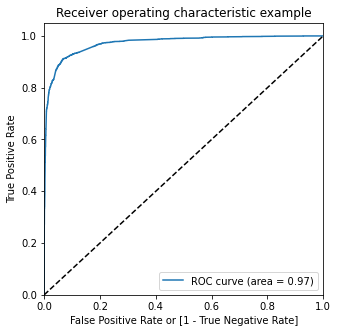

In [139]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002362,0,1,0,0,0,0,0,0,0,0,0
1,0,0.059074,0,1,0,0,0,0,0,0,0,0,0
2,0,0.121974,0,1,1,0,0,0,0,0,0,0,0
3,0,0.212993,0,1,1,1,0,0,0,0,0,0,0
4,0,0.375524,0,1,1,1,1,0,0,0,0,0,0


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379332  1.000000  0.000000
0.1   0.1  0.848929  0.974668  0.772081
0.2   0.2  0.903749  0.933555  0.885533
0.3   0.3  0.919345  0.914452  0.922335
0.4   0.4  0.923913  0.894103  0.942132
0.5   0.5  0.924071  0.873339  0.955076
0.6   0.6  0.915879  0.825166  0.971320
0.7   0.7  0.911783  0.803571  0.977919
0.8   0.8  0.905009  0.775748  0.984010
0.9   0.9  0.888469  0.722176  0.990102


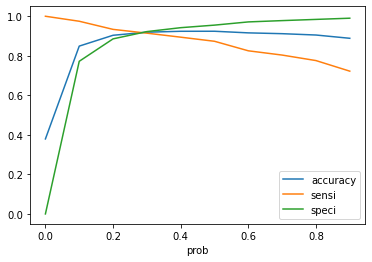

In [142]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002362,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.059074,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.121974,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.212993,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.375524,0,1,1,1,1,0,0,0,0,0,0,1


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9193446754883428

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3634,  306],
       [ 206, 2202]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9144518272425249

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.9223350253807107

## Precision and Recall Framework

We want the recall percentage to be 80%

In [149]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3763,  177],
       [ 305, 2103]], dtype=int64)

In [150]:
from sklearn.metrics import precision_score, recall_score

In [151]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9223684210526316

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8733388704318937

### Precision and recall tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

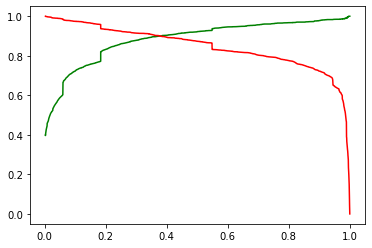

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [156]:
thresholds[p[:-1]==r[:-1]]

array([0.37749554])

Optimal cutoff point is 0.37749554

In [157]:
y_train_pred_final['final_predicted_precision_recall'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37749554 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_precision_recall
0,0,0.002362,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.059074,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.121974,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0.212993,0,1,1,1,0,0,0,0,0,0,0,0,0
4,0,0.375524,0,1,1,1,1,0,0,0,0,0,0,1,0


In [158]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_precision_recall)

0.8999169435215947

In [159]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_precision_recall)

0.8999169435215947

# Making predictions on the test set

In [160]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7824,-0.543577,1,0,0,0,0,0,0,0,0,0,0,0
9131,0.104613,0,0,0,0,0,0,0,0,0,1,0,0
725,1.333054,0,0,0,1,0,0,0,0,0,0,1,0
6573,-0.225909,1,0,0,1,0,0,0,0,0,1,0,0
6554,1.064964,1,0,0,0,1,0,0,0,0,0,1,0


In [161]:
X_test_sm = sm.add_constant(X_test)

In [162]:
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

7824    0.001983
9131    0.004449
725     0.995337
6573    0.004566
6554    0.997199
dtype: float64

In [163]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7824,0.001983
9131,0.004449
725,0.995337
6573,0.004566
6554,0.997199


In [164]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
7824,0
9131,0
725,1
6573,0
6554,1


In [165]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_test_pred_final.head()

,Converted,0
7824,0,0.001983
9131,0,0.004449
725,1,0.995337
6573,0,0.004566
6554,1,0.997199


In [166]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_test_pred_final.head()

,Converted,Converted_Prob
7824,0,0.001983
9131,0,0.004449
725,1,0.995337
6573,0,0.004566
6554,1,0.997199


In [167]:
y_test_pred_final['final_predicted_precision_recall'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37749554 else 0)

In [168]:
y_test_pred_final.head()

,Converted,Converted_Prob,final_predicted_precision_recall
7824,0,0.001983,0
9131,0,0.004449,0
725,1,0.995337,1
6573,0,0.004566,0
6554,1,0.997199,1


In [169]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted_precision_recall)

0.920249908122014

In [170]:
precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted_precision_recall)

0.8953033268101761

In [171]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted_precision_recall)

0.8926829268292683

Recall score obtained on test set is 89.27%

# Preparing Final Dataset

In [172]:
Final_df = pd.read_csv("Leads.csv")
Final_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [173]:
Final_df["Lead_ID"] = Final_df.index
Final_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_ID
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,2
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,3
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,4


In [174]:
y_train_pred = res.predict(X_train_sm)

In [175]:
y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred.head()

,0
5171,0.002362
5165,0.059074
8333,0.121974
1248,0.212993
1429,0.375524


In [176]:
y_train_pred["Lead_ID"] = y_train_pred.index
y_train_pred.head()

,0,Lead_ID
5171,0.002362,5171
5165,0.059074,5165
8333,0.121974,8333
1248,0.212993,1248
1429,0.375524,1429


In [177]:
y_test_pred = res.predict(X_test_sm)
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
7824,0.001983
9131,0.004449
725,0.995337
6573,0.004566
6554,0.997199


In [178]:
y_test_pred["Lead_ID"] = y_test_pred.index
y_test_pred.head()

,0,Lead_ID
7824,0.001983,7824
9131,0.004449,9131
725,0.995337,725
6573,0.004566,6573
6554,0.997199,6554


In [179]:
y_train_pred.merge(y_test_pred,on="Lead_ID",how="outer")

,0_x,Lead_ID,0_y
0,0.002362,5171,NaN
1,0.059074,5165,NaN
2,0.121974,8333,NaN
3,0.212993,1248,NaN
4,0.375524,1429,NaN
...,...,...,...
9064,NaN,1012,0.016500
9065,NaN,4289,0.011880
9066,NaN,4746,0.012053
9067,NaN,7984,0.964181


In [180]:
y_final_prob_dataset = pd.concat([y_train_pred,y_test_pred],axis=0)
y_final_prob_dataset

,0,Lead_ID
5171,0.002362,5171
5165,0.059074,5165
8333,0.121974,8333
1248,0.212993,1248
1429,0.375524,1429
...,...,...
1012,0.016500,1012
4289,0.011880,4289
4746,0.012053,4746
7984,0.964181,7984


In [181]:
y_final_prob_dataset.sort_values("Lead_ID",ascending=True,inplace=True)

In [182]:
y_final_prob_dataset

,0,Lead_ID
0,0.007443,0
1,0.020766,1
2,0.994370,2
3,0.001145,3
4,0.975446,4
...,...,...
9235,0.989622,9235
9236,0.041081,9236
9237,0.037973,9237
9238,0.382888,9238


In [183]:
y_final_prob_dataset= y_final_prob_dataset.rename(columns={ 0 : 'Lead_Score'})
y_final_prob_dataset.head()

,Lead_Score,Lead_ID
0,0.007443,0
1,0.020766,1
2,0.994370,2
3,0.001145,3
4,0.975446,4


In [184]:
y_final_prob_dataset["Lead_Score"] = y_final_prob_dataset["Lead_Score"]*100

In [185]:
y_final_prob_dataset.head()

,Lead_Score,Lead_ID
0,0.744311,0
1,2.076626,1
2,99.437011,2
3,0.114458,3
4,97.544610,4


In [186]:
Final_df = Final_df.merge(y_final_prob_dataset,on="Lead_ID")

In [187]:
Final_df.drop("Lead_ID",axis=1,inplace=True)

In [188]:
#Final Dataset with Lead score is
Final_df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0.744311
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,2.076626
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,99.437011
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,0.114458
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,97.544610
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified,5.907367
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified,99.550730
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified,5.907367
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened,4.461514
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened,9.782348
